In [1]:
from __future__ import print_function, division  # Python 2 compatibility if needed

In [2]:
import numpy as np
import numpy.random as rn
import matplotlib.pyplot as plt  # to plot
import matplotlib as mpl

from scipy import optimize       # to compare

import seaborn as sns
sns.set(context="talk", style="darkgrid", palette="hls", font="sans-serif", font_scale=1.05)

FIGSIZE = (19, 8)  #: Figure size, in inches!
mpl.rcParams['figure.figsize'] = FIGSIZE

In [3]:
def annealing(random_start,
              cost_function,
              random_neighbour,
              acceptance,
              temperature,
              maxsteps=1000,
              debug=True):
    """ Optimize the black-box function 'cost_function' with the simulated annealing algorithm."""
    state = random_start()
    cost = cost_function(state)
    states, costs = [state], [cost]
    for step in range(maxsteps):
        fraction = step / float(maxsteps)
        T = temperature(fraction)
        new_state = random_neighbour(state, fraction)
        new_cost = cost_function(new_state)
        if debug: print("Step #{:>2}/{:>2} : T = {:>4.3g}, state = {:>4.3g}, cost = {:>4.3g}, new_state = {:>4.3g}, new_cost = {:>4.3g} ...".format(step, maxsteps, T, state, cost, new_state, new_cost))
        if acceptance_probability(cost, new_cost, T) > rn.random():
            state, cost = new_state, new_cost
            states.append(state)
            costs.append(cost)
            # print("  ==> Accept it!")
        # else:
        #    print("  ==> Reject it...")
    return state, cost_function(state), states, costs

In [4]:
interval = (-10, 10)

def f(x):
    """ Function to minimize."""
    return x ** 2

def clip(x):
    """ Force x to be in the interval."""
    a, b = interval
    return max(min(x, b), a)

In [5]:
def random_start():
    """ Random point in the interval."""
    a, b = interval
    return a + (b - a) * rn.random_sample()

In [6]:
def cost_function(x):
    """ Cost of x = f(x)."""
    return f(x)

In [7]:
def random_neighbour(x, fraction=1):
    """Move a little bit x, from the left or the right."""
    amplitude = (max(interval) - min(interval)) * fraction / 10
    delta = (-amplitude/2.) + amplitude * rn.random_sample()
    return clip(x + delta)

In [8]:
def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        # print("    - Acceptance probabilty = 1 as new_cost = {} < cost = {}...".format(new_cost, cost))
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        # print("    - Acceptance probabilty = {:.3g}...".format(p))
        return p

In [9]:
def temperature(fraction):
    """ Example of temperature decreasing as the process goes on."""
    return max(0.01, min(1, 1 - fraction))

In [10]:
print(random_neighbour)

<function random_neighbour at 0x0000020AD31FC9D8>


In [11]:
annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=30, debug=True);

Step # 0/30 : T =    1, state = 8.61, cost = 74.2, new_state = 8.61, new_cost = 74.2 ...
Step # 1/30 : T = 0.967, state = 8.61, cost = 74.2, new_state = 8.61, new_cost = 74.1 ...
Step # 2/30 : T = 0.933, state = 8.61, cost = 74.1, new_state = 8.64, new_cost = 74.7 ...
Step # 3/30 : T =  0.9, state = 8.61, cost = 74.1, new_state = 8.59, new_cost = 73.8 ...
Step # 4/30 : T = 0.867, state = 8.59, cost = 73.8, new_state = 8.48, new_cost = 71.8 ...
Step # 5/30 : T = 0.833, state = 8.48, cost = 71.8, new_state = 8.34, new_cost = 69.6 ...
Step # 6/30 : T =  0.8, state = 8.34, cost = 69.6, new_state = 8.54, new_cost = 72.9 ...
Step # 7/30 : T = 0.767, state = 8.34, cost = 69.6, new_state = 8.22, new_cost = 67.5 ...
Step # 8/30 : T = 0.733, state = 8.22, cost = 67.5, new_state = 7.96, new_cost = 63.4 ...
Step # 9/30 : T =  0.7, state = 7.96, cost = 63.4, new_state =  7.9, new_cost = 62.4 ...
Step #10/30 : T = 0.667, state =  7.9, cost = 62.4, new_state = 8.07, new_cost = 65.1 ...
Step #11/30 : 

In [12]:
state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)

state
c

0.0004774709128300568

In [13]:
def see_annealing(states, costs):
    plt.figure()
    plt.suptitle("Evolution of states and costs of the simulated annealing")
    plt.subplot(121)
    plt.plot(states, 'r')
    plt.title("States")
    plt.subplot(122)
    plt.plot(costs, 'b')
    plt.title("Costs")
    plt.show()

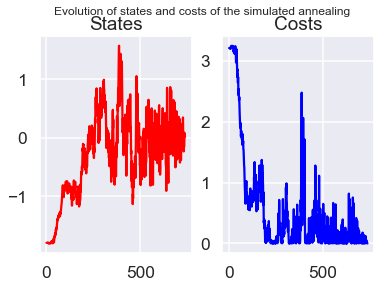

In [14]:
see_annealing(states, costs)

In [15]:
def visualize_annealing(cost_function):
    state, c, states, costs = annealing(random_start, cost_function, random_neighbour, acceptance_probability, temperature, maxsteps=1000, debug=False)
    see_annealing(states, costs)
    return state, c

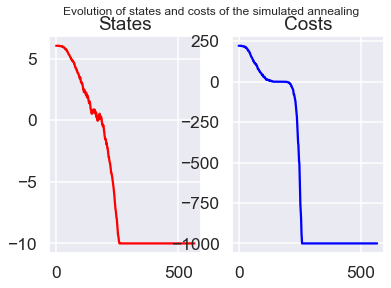

(-10, -1000)

In [16]:
visualize_annealing(lambda x: x**3)

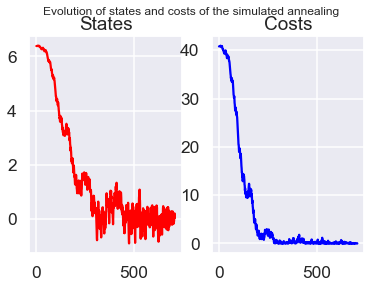

(0.031817536374180166, 0.001012355620922278)

In [17]:
visualize_annealing(lambda x: x**2)

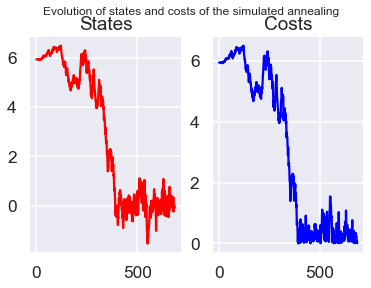

(-0.012523195171141033, 0.012523195171141033)

In [18]:
visualize_annealing(np.abs)

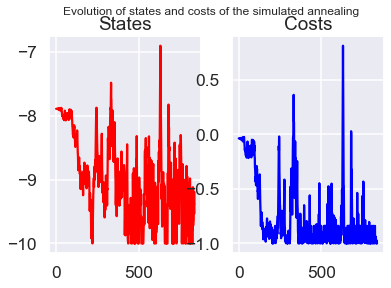

(-9.528200757531756, -0.9946566279512651)

In [19]:
visualize_annealing(np.cos)

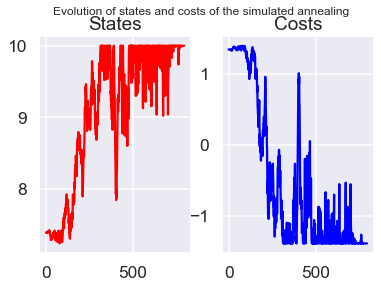

(10, -1.383092639965822)

In [19]:
visualize_annealing(lambda x: np.sin(x) + np.cos(x))